In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [53]:
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
alpha = 1e-4 # thermal diffusivity

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# initial condition
T0 = 20.0 * numpy.ones((ny, nx)) # first indix is y point, second indix is x point
T0[0, :] = 100.0 # boundary Neunman
T0[:, 0] = 100.0

In [62]:
# CFL limit
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha
nt = 1500 # time steps

In [63]:
# Forward in time, central difference in space
def ftcs(T0, nt, dt, dx, dy, alpha, nx, ny):
    T = T0.copy()
    # constants
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    center_x = int(nx / 2)
    center_y = int(ny / 2)
    print('Total simulation time is ', nt * dt, 'seconds.\n')
    for n in range(nt):
        T[1:-1,1:-1] = T[1:-1,1:-1] + sigma_x * (T[1:-1,2:] - 2 * T[1:-1:,1:-1] + T[1:-1,:-2]) +\
        sigma_y * (T[2:,1:-1] - 2 * T[1:-1,1:-1] + T[:-2,1:-1])
        # Boundary condition
        T[-1,:] = T[-2,:]
        T[:,-1] = T[:,-2]
        if T[center_x,center_y] >= 70.0:
            print('Alert! Melting down!\n')
            print('It happens at time ', n * dt, ' seconds')
            break
    return T

In [64]:
T = ftcs(T0, nt, dt, dx, dy, alpha, nx, ny)

Total simulation time is  0.9374999999999999 seconds.

Alert! Melting down!

It happens at time  0.159375  seconds


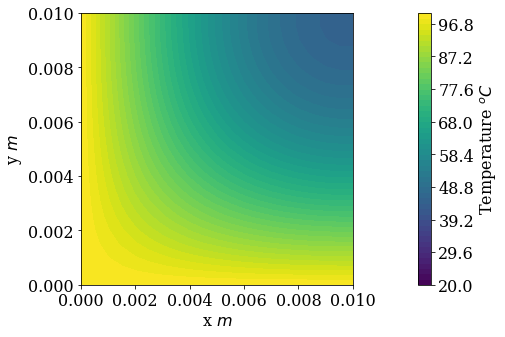

In [65]:
# plot
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel(r'x $m$')
pyplot.ylabel(r'y $m$')
levels = numpy.linspace(20.0, 100.0, num=51)
contf = pyplot.contourf(x, y, T, levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label(r'Temperature $^{o}C$')
pyplot.axis('scaled', adjustable='box');